<a href="https://colab.research.google.com/github/Rahman88talha/Capstone_Project_Stock_Closing_Price_Prediction/blob/main/Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

#We have Yes Bank monthly stock price dataset. It has following feature (Column):
### **1) Open** : Opening price of the stock of particular day
### **2) High** : It's the highest price at which a stock traded during a period
### **3) Low** : It's the lowest price at which stock traded during a period
### **4) Close** : Closing price of a stock at the end of a Trading Day
### **5) Date** : We will use it as a index

# **Loading the Data**

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Importing libraries for EDA

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# EDA

### **Data Preparation**

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Capstone Project Supervised ML Regression(Alma Better)/data_YesBank_StockPrices.csv")

In [8]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [9]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [10]:
df.shape

(185, 5)

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [13]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Checking for Null & duplicate values

In [14]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [15]:
dup=df.duplicated()
print(dup.value_counts())

False    185
dtype: int64


There are no duplicate and null values in this dataset

**Note!** The "Date" Column in this dataset needs to be converted to date time object. The current MM-YY format will be converted to proper format of date i,e YYYY-MM-DD 

In [16]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

Now the Date format has changed

In [17]:
df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


# Data Visualization

Visualization will be divided into two part:
1) Univariate Analysis
2) Bi-variate Analysis


First Thing First! Bifurcating Dependent and Independent Features

We will consider "High", "Low", "Open" as independent features and "Close" as dependent.
So,

Using Copy of Dataset for Better Clarity

In [19]:
df1 = df.copy()            # For calculation purpose, So that our original data is preserved

In [20]:
ind_var = df1[['High','Low','Open']]
dep_var = df1['Close']

## **Univariate Analysis**

Now, Let's see Graphs of Dependent and Independent variables

**Independent:**

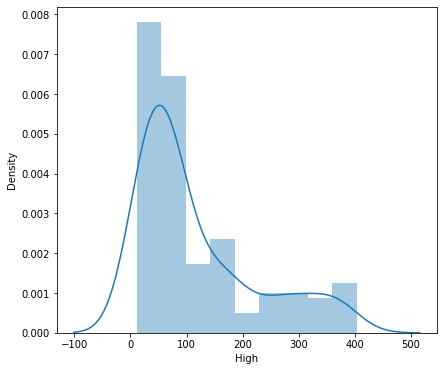

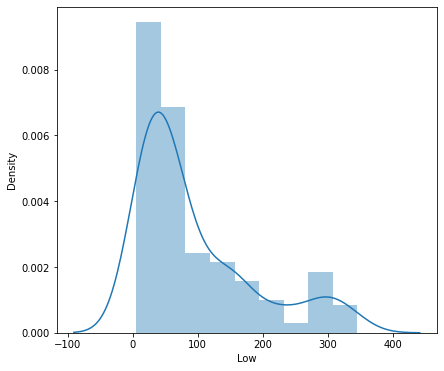

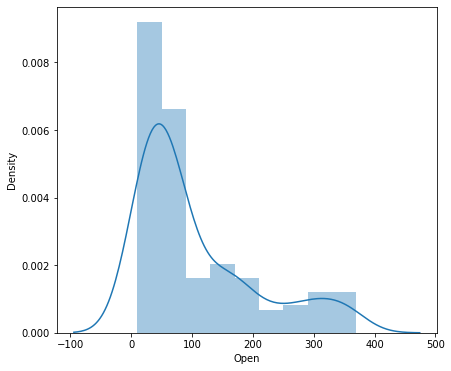

In [21]:
for var in ind_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna())
    fig.set_ylabel('Density')
    fig.set_xlabel(var)

Now, For Dependent variable

**Dependent:**

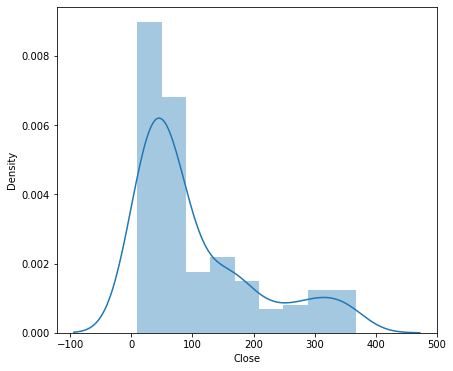

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'].dropna())

here, We can see our data is Right Skewed(Positive). So, we need to transform it Normal distribution.

Log Transformation is the process we will perform:

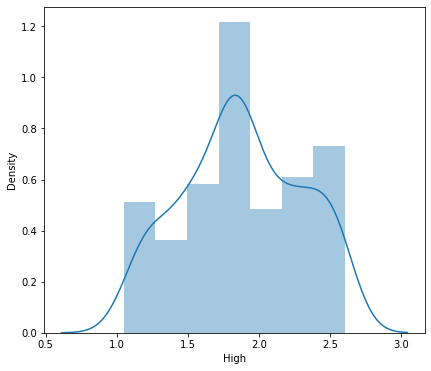

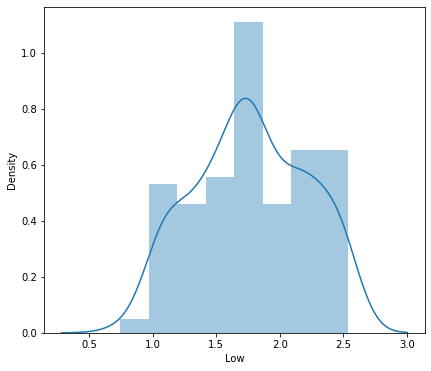

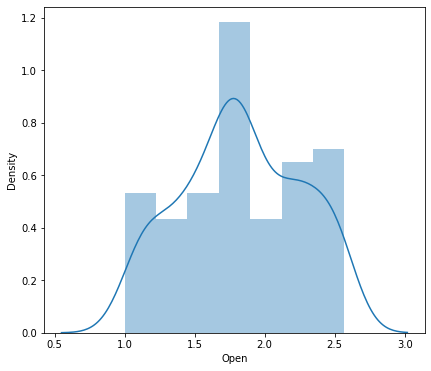

In [23]:
for var in ind_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]))

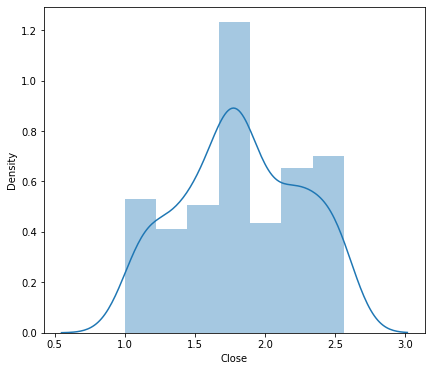

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(np.log10(df1['Close']))

Now, Our features look Normally distributed to an extent.

# **Bi-Variate Analysis**

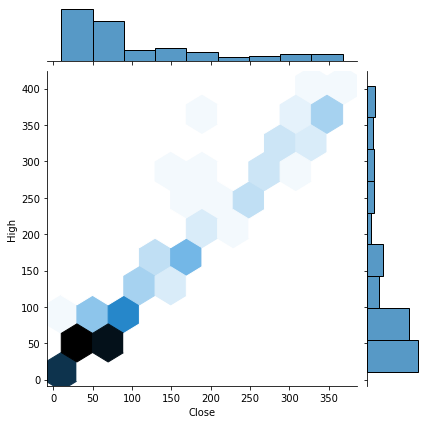

In [25]:
sns.jointplot(y ='High', x ='Close', data = df1, kind ='hex')
plt.show()

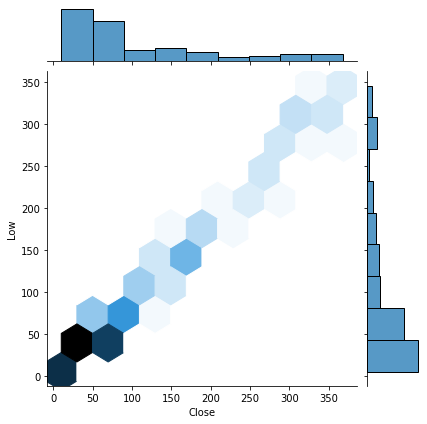

In [26]:
sns.jointplot(y ='Low', x ='Close', data = df1, kind ='hex')
plt.show()

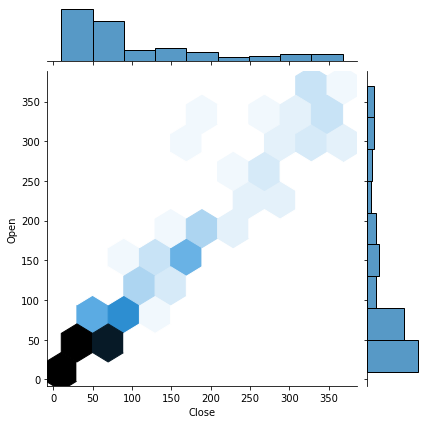

In [27]:
sns.jointplot(y ='Open', x ='Close', data = df1, kind ='hex')
plt.show()

We can Conclude here from the graph that Independent variables are linearly related to dependent variable(Close).

##Pearson’s Correlation:
The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

Here, we need to check the correlation value(Correlation Coeffiecient) between variable.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.


**Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))**

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation.


In [28]:
from scipy.stats import pearsonr
import scipy.stats
# Convert dataframe into series
list1 = df1['Open']
list2 = df1['Close']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.978


In [29]:
list3 = df1['High']
list2 = df1['Close']
corr, _ = pearsonr(list3, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.985


In [30]:
list4 = df1['Low']
list2 = df1['Close']
corr, _ = pearsonr(list4, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.995


We can see that the two variables are positively and Highly correlated and that the correlation is 0.978, 0.985, 0.995. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.

##Correlation Matrix

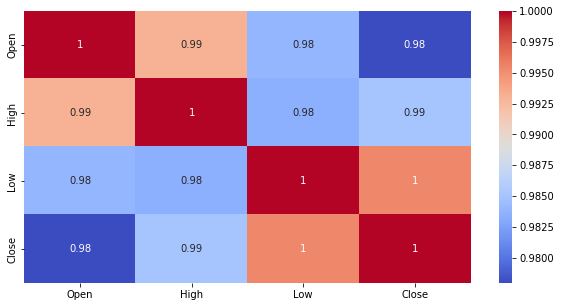

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()

# Regression Analysis

### Now Importing Libraries for Regression Analysis

In [32]:
from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

Before We start regression , we must check VIF(Variance Inflation Factor) of our Data Frame.
As there seems to be High Multicollinearity in our Data.

In [33]:
def calculate_vif(dataset):
  vif = pd.DataFrame()
  vif["features"] = dataset.columns
  vif["VIF_Value"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
  return (vif)

In [34]:
calculate_vif(df1[[i for i in df1.describe().columns if i not in ['Date']]])

,features,VIF_Value
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


### Oops! very high VIF values which suggests high multicollinearity among variables. So, In Order to to reduce VIF, we need to drop variable(s).

But, We can't remove any variables from our date because each of the variables are important for our model.

In [35]:
#train test data split
x_train, x_test,y_train, y_test = train_test_split(ind_var,dep_var,test_size=.20,random_state=1)

In [36]:
print(x_train.shape)
print(x_test.shape)

(148, 3)
(37, 3)


In [37]:
#data transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Linear Regression

In [38]:
# Fitting Linear Regression to the Training set
reg = LinearRegression().fit(x_train, y_train)

In [39]:
reg.score(x_train, y_train)

0.9943947124704909

In [40]:
reg.coef_

array([ 206.39223501,  339.75965241, -178.58396386])

In [41]:
reg.intercept_

7.981643192931017

In [43]:
#Predict y_test on the basis of train sets
y_pred = reg.predict(x_test)
print("Printed values of Y: \n",y_pred)

Printed values of Y: 
 [ 26.5264613   30.04697913  52.99506974  14.74919015 147.01000347
 339.97588471  47.57404618  26.7156191   25.53891247  51.5485512
 167.1168406   52.40492841  15.03278394 317.19036116  74.02532594
  48.98214465  28.10792019 134.70037858 106.16190122  90.75305749
  28.99576342  15.52145954 108.22518038  58.74416284 165.96721099
  19.27101903  15.01972066  51.82026038  30.42231711  62.47316615
 261.58897929 338.47373229  65.29568021 232.0096057   95.84913545
  54.02351579 242.48451636]


### Evaluation:-